In [11]:
import json
import cv2
import pandas as pd
from matplotlib import pyplot as plt

<h1>Make sure data is OK</h1>

In [8]:
color_mapping = {'fireextinguisher': (120, 0, 110),
                 'chair': (0, 255, 0),
                 'exit': (255, 0, 0),
                 'clock': (255, 255, 0),
                 'trashbin': (0, 255, 255),
                 'screen': (0, 0, 255),
                 'printer': (30, 200, 32)}

In [3]:
dataset = pd.read_csv("full_data.csv")

In [4]:
dataset.head()

,image,annotation,fireextinguisher,chair,exit,clock,trashbin,screen,printer
0,/home/evgenii/repos/indoor/Dataset/sequence_1/...,/home/evgenii/repos/indoor/Dataset/annotations...,0,0,1,0,0,0,0
1,/home/evgenii/repos/indoor/Dataset/sequence_1/...,/home/evgenii/repos/indoor/Dataset/annotations...,1,0,0,0,0,0,0
2,/home/evgenii/repos/indoor/Dataset/sequence_1/...,/home/evgenii/repos/indoor/Dataset/annotations...,0,0,0,1,0,0,0
3,/home/evgenii/repos/indoor/Dataset/sequence_1/...,/home/evgenii/repos/indoor/Dataset/annotations...,0,1,0,0,0,0,0
4,/home/evgenii/repos/indoor/Dataset/sequence_1/...,/home/evgenii/repos/indoor/Dataset/annotations...,0,1,0,0,0,0,0


In [26]:
def visualize(row: pd.DataFrame) -> None:
    img = cv2.imread(row["image"])
    with open(row["annotation"], 'r') as bin_an:
        annotations = json.load(bin_an)
    for ann in annotations["annotations"]:
        box = ann["box"]
        label = ann["label"]
        color = color_mapping[label]
        cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color, 4)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    plt.imshow(img)
    plt.show()

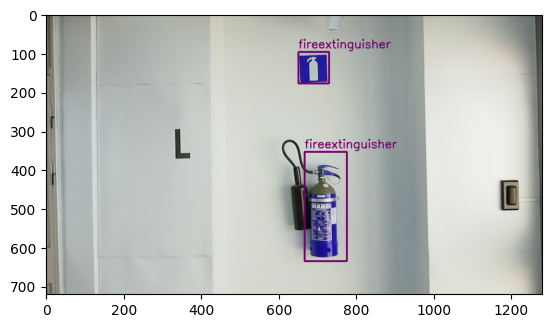

In [27]:
visualize(dataset.iloc[1])

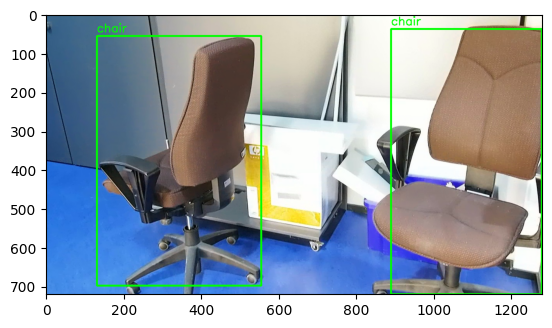

In [28]:
visualize(dataset.iloc[1200])

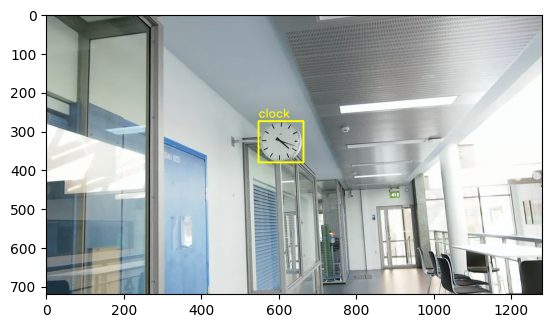

In [29]:
visualize(dataset.iloc[2100])

# Train-Val Split

In [63]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(dataset, test_size=0.15, random_state=11)

<BarContainer object of 7 artists>

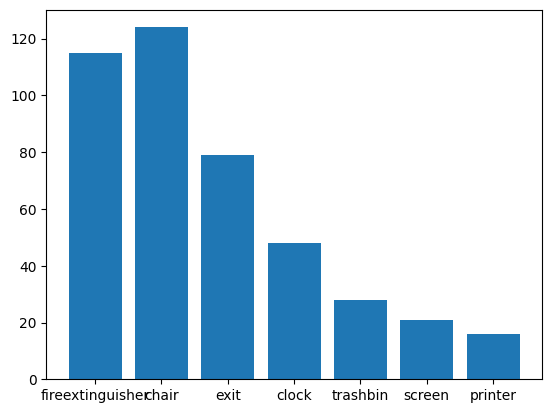

In [64]:
plt.bar(val.columns[2:], val.iloc[:, 2:].sum())

<BarContainer object of 7 artists>

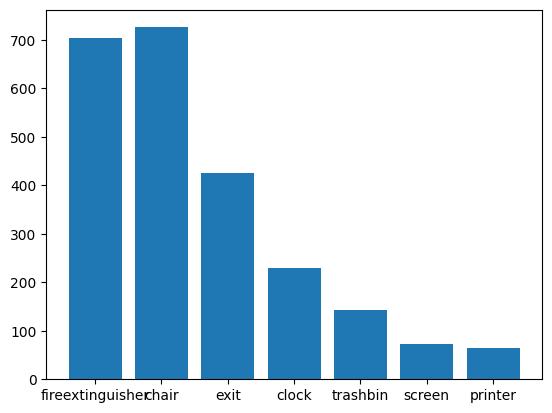

In [65]:
plt.bar(train.columns[2:], train.iloc[:, 2:].sum())

In [67]:
val.to_csv

1881

In [68]:
val.to_csv("../splits/val.csv", index=False)

In [69]:
train.to_csv("../splits/train.csv", index=False)